# Final Project Submission

* Student name:  Natalya Doris
* Student pace: self paced
* Scheduled project review date/time: Monday, Aug 1, 1pm
* Instructor name: Abhineet Kulkarni / Claude Fried
* Blog post URL:


## Data Inspection and Initial Cleaning

### Import Data & Necessary Packages

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, ShuffleSplit
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

Loading in data from the King County House Sales dataset:

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


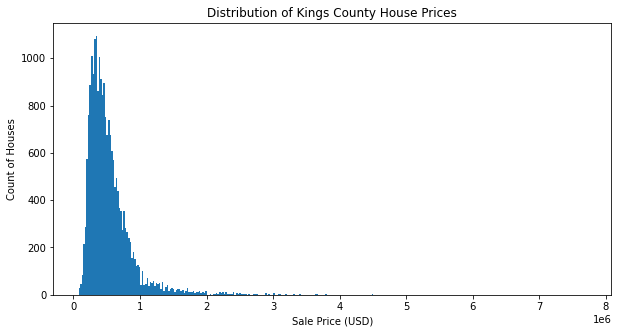

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['price'], bins='auto')

ax.set_xlabel("Sale Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Kings County House Prices");

Taking the log makes this data much more normal. Will keep that in mind for later.

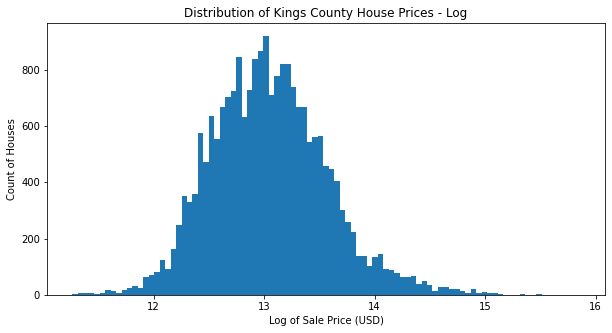

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(np.log(df['price']), bins='auto')

ax.set_xlabel("Log of Sale Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Kings County House Prices - Log");

In [7]:
y = df['price']
X = df.drop(['price'], axis=1)

### Handling Missing Values & Cleaning the Data

In [8]:
X.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
print(len(df[df["waterfront"].isna()]))
print(len(df[df["view"].isna()]))
print(len(df[df["yr_renovated"].isna()]))
print(" ")
print(len(df[df["yr_renovated"]==0])) 
print(len(df[df["view"]=='NONE']))
print(" ")
print(len(df[df["waterfront"].isna() & (df["view"]=='NONE')])) # houses with waterfront as NA don't have view
print(len(df[df["view"].isna() | (df["view"]=='NONE')]))

2376
63
3842
 
17011
19422
 
2110
19485


In [10]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [11]:
X['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

While there aren't many missing values, a significant number of houses have no view, are not waterfront, or have a 0 value for year renovated. I am inclined not to include these variables in the model as very few houses are impacted by these metrics. Nonetheless, I will perform some feature engineering so that I can see how they impact the model.

In [12]:
X['yr_renovated'][X['yr_renovated'] == 0] = 'NA'
X['yr_renovated'][X['yr_renovated'].isna()] = 'NA'
X['renovated'] = [False if house=='NA' else True for house in X['yr_renovated']]

sum(X['renovated'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_23785/3075262707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['yr_renovated'][X['yr_renovated'] == 0] = 'NA'


744

In [13]:
X['view'][X['view'].isna()] = 'NA'
set(X['view'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_23785/670772084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['view'][X['view'].isna()] = 'NA'


{'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NA', 'NONE'}

In [14]:
X['waterfront'][X['waterfront'].isna()] = 'NA'
X['waterfront'].value_counts()

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_23785/808933529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['waterfront'][X['waterfront'].isna()] = 'NA'


NO     19075
NA      2376
YES      146
Name: waterfront, dtype: int64

In [15]:
print(X['date'][0])

X['date'] = [datetime.strptime(date, '%m/%d/%Y') for date in X['date']]
X['yr_sold'] = pd.DatetimeIndex(X['date']).year
X['mth_sold'] = pd.DatetimeIndex(X['date']).month

X.head()

10/13/2014


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,yr_sold,mth_sold
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NA,NONE,Average,...,1955,NA,98178,47.5112,-122.257,1340,5650,False,2014,10
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,2014,12
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NA,98028,47.7379,-122.233,2720,8062,False,2015,2
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,NA,98136,47.5208,-122.393,1360,5000,False,2014,12
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,NA,98074,47.6168,-122.045,1800,7503,False,2015,2


In [16]:
X['grade'] = [int(grade.split(" ")[0]) for grade in X['grade']]
set(X['grade'])

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [17]:
set(X['condition']) # need to get rid of space in very good for model purposes

{'Average', 'Fair', 'Good', 'Poor', 'Very Good'}

In [18]:
X['condition'][X['condition']=='Very Good'] = 'VeryGood'
set(X['condition'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_23785/3950577358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['condition'][X['condition']=='Very Good'] = 'VeryGood'


{'Average', 'Fair', 'Good', 'Poor', 'VeryGood'}

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  object        
 15  zipcode        2159

## Baseline Model

### Checking Correlations

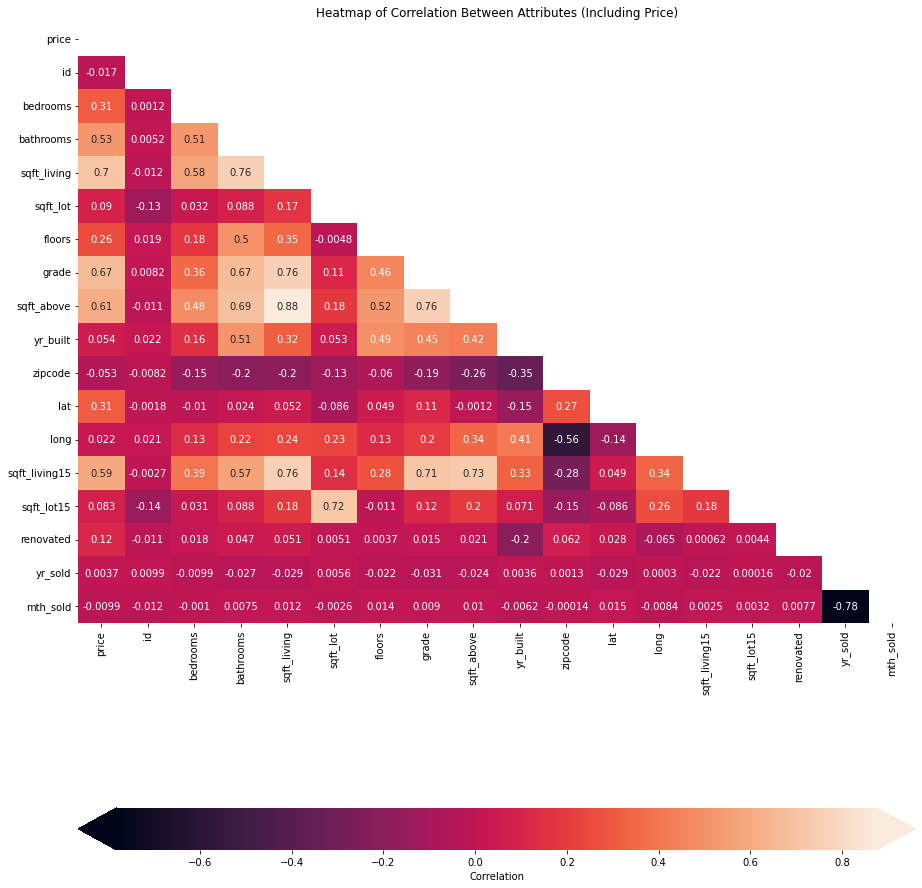

In [20]:
heatmap_data = pd.concat([y, X], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(15, 17))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax,
    annot=True, cbar_kws={"label": "Correlation", "orientation": "horizontal", 
                          "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Price)");

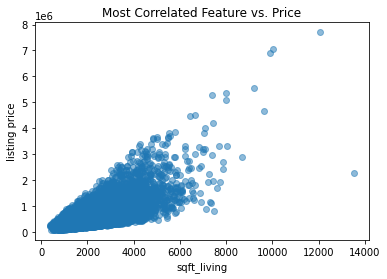

In [21]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(X[most_correlated_feature], y, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

# I suspect a log transformation will improve the linearity

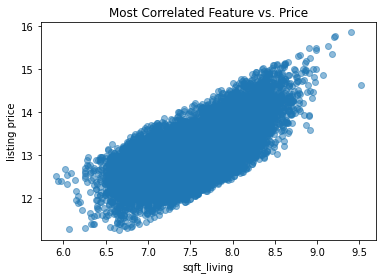

In [22]:
fig, ax = plt.subplots()

ax.scatter(np.log(X[most_correlated_feature]), np.log(y), alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

# very linear after log transformation

### Build Baseline Model With Most Correlated Feature as Independent Variable

Even if we hadn't used correlation to pick an independent variable for this first model, square footage would have been an obvious choice. It makes sense that a house's square footage has a positive relationship with price.

In [23]:
outcome = 'price'
data_ols = pd.concat([X, y], axis=1)
predictors = 'sqft_living'
formula = outcome + '~' + predictors

base_model = ols(formula=formula, data=data_ols).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:24:10   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Base Model Assumptions

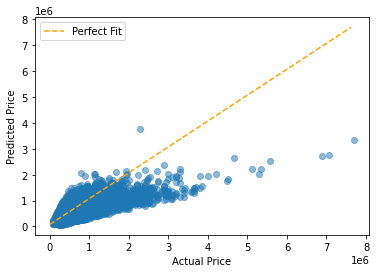

In [24]:
# Linearity check

X_base = X[most_correlated_feature]

preds = base_model.predict(X_base)
fig, ax = plt.subplots()

perfect_line = np.arange(y.min(), y.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

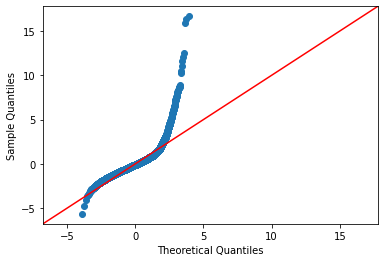

In [25]:
# Normality check

residuals = (y - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [26]:
# JB test for normality (also shown in model summary)
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(base_model.resid)
list(zip(name, test))

[('Jarque-Bera', 542662.604395781),
 ('Prob', 0.0),
 ('Skew', 2.8196584324835365),
 ('Kurtosis', 26.90063410219435)]

We have a JB value = ~543,000, indicating that errors are not normally distributed. The p-value of 0.0 also favors rejecting the normality null hypothesis at the 5% significance level. Additionally, the kurtosis is above 3, which indicates heavier tails than a normal distribution. The skewness value also shows that underlying data is heavily skewed.

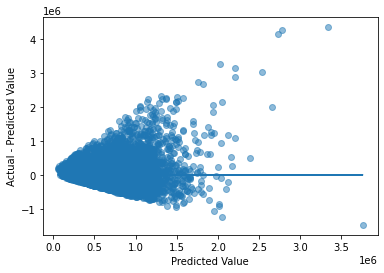

In [27]:
# Homoscedasticity check - conelike shape suggests heteroskedasticity of residuals

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_base))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [28]:
# Goldfeld Quandt test for homoscedasticity check

lwr_thresh = data_ols.sqft_living.quantile(q=.45)
upr_thresh = data_ols.sqft_living.quantile(q=.55)
middle_10percent_indices = data_ols[(data_ols.sqft_living >= lwr_thresh) 
                                    & (data_ols.sqft_living<=upr_thresh)].index
indices = [x-1 for x in data_ols.index if x not in middle_10percent_indices]

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(base_model.resid.iloc[indices], base_model.model.exog[indices])
list(zip(name, test))

[('F statistic', 0.9159859051813802), ('p-value', 0.9999921364751672)]

While this relatively large F statistic suggests heteroscedasticity, we cannot confirm this result via the GQ test given the p-value > 0.05. A cone-like shape as seen in the graph above, however, shows obvious heteroscedasticity, in my opinion.

This baseline model fails all of our assumption checks. Let's see if we can improve the next one..

### Preprocess Data and Check Model Assumptions

Visually inspecting relationships between numerical variables and price:

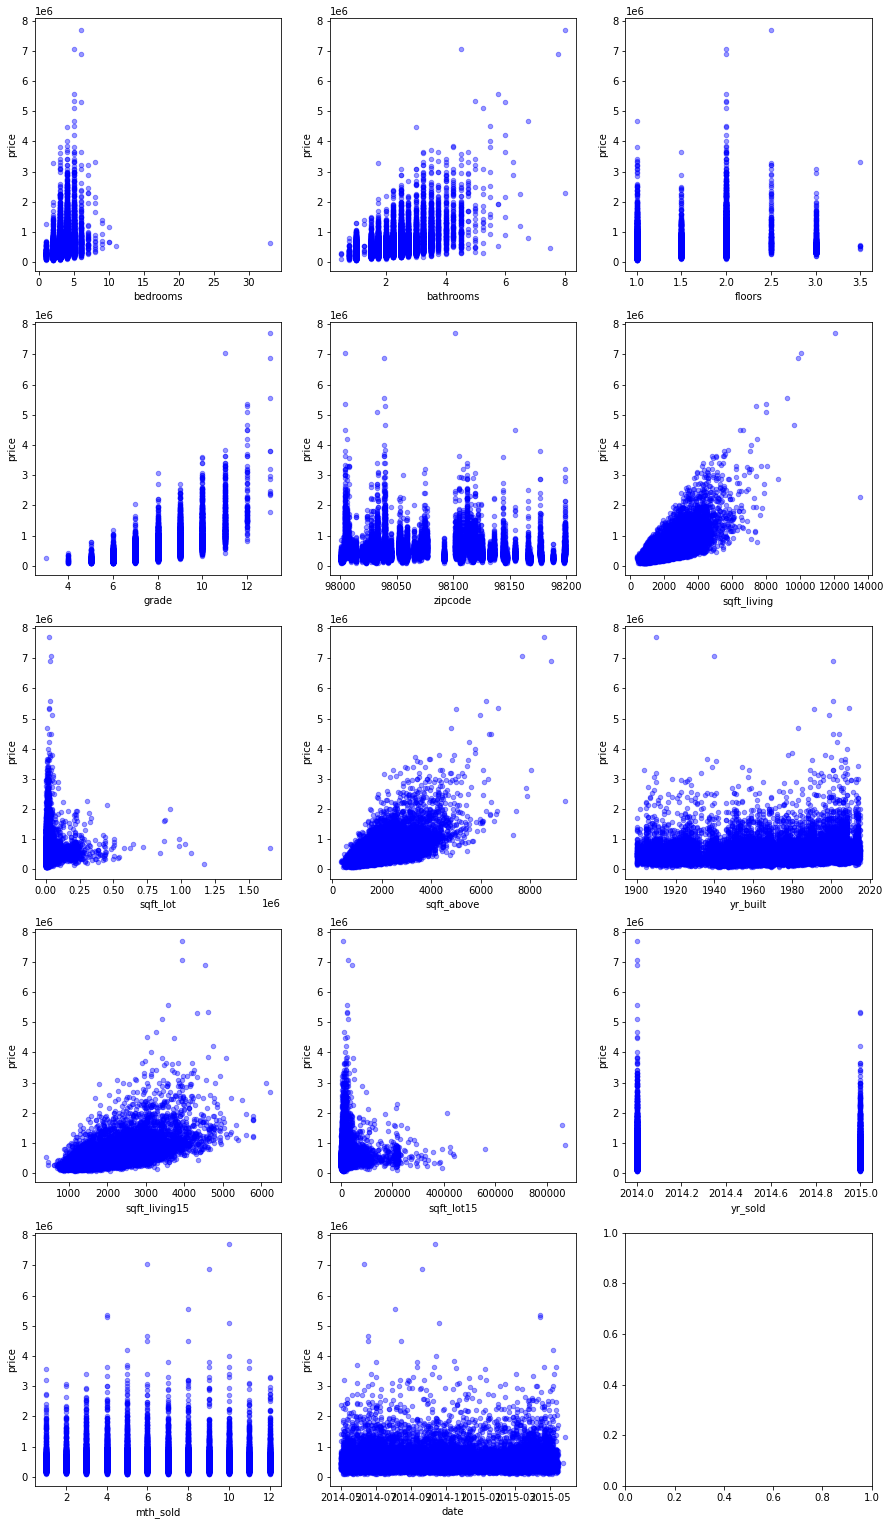

In [29]:
num_cols = ['bedrooms', # number of bedrooms
            'bathrooms', # number of bathrooms
            'floors', # number of floors (levels) in the house
            'grade', # Overall grade of the house. Related to the construction and design of the house
            'zipcode', #  zip code
            'sqft_living', # sq. ft. of living space
            'sqft_lot', # Square footage of the lot
            'sqft_above', # Square footage of house apart from basement
            'yr_built', # year house was built
            'sqft_living15', # sq. ft. of interior housing living space for the nearest 15 neighbors
            'sqft_lot15', # sq. ft. of the land lots of the nearest 15 neighbors
            'yr_sold', # year house was sold
            'mth_sold', # month house was sold
            'date'
           ]

data = pd.concat([X, y], axis=1)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,27))
axe = axes.ravel()

for xcol, ax in zip(num_cols, axe):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

I am going to exclude latitude and longitude as we can use zip code to represent location/neighborhood. I'd like to treat zip code as a categorical variable since this is not really a linear relationship but it is possible that certain zip codes have a higher average price.

In [30]:
relevant_columns = ['bedrooms', # number of bedrooms
                    'bathrooms', # number of bathrooms
                    'floors', # number of floors (levels) in the house
                    'waterfront', # whether the house is on the waterfront
                    'view', # quality of view from house
                    'condition', # How good the overall condition of the house is;
                                 # related to maintenance of house.
                    'grade', # Overall grade of the house. Related to the construction and design of the house
                    'zipcode', #  zip code
                    'sqft_living', # sq. ft. of living space
                    'sqft_lot', # Square footage of the lot
                    'sqft_above', # Square footage of house apart from basement
                    'yr_built', # year house was built
                    'sqft_living15', # sq. ft. of interior housing living space for the nearest 15 neighbors
                    'sqft_lot15', # sq. ft. of the land lots of the nearest 15 neighbors
                    'mth_sold', # month house was sold
                    'yr_sold',
                    'lat', # latitude
                    'renovated' # whether a house had a year populated in the yr_renovated column
                   ]
                    
categoricals = ['waterfront', 'view', 'condition', 'zipcode']
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'grade', 'yr_built', 
              'sqft_living15', 'sqft_lot15', 'floors', 'lat', 'renovated', 'yr_sold', 'mth_sold'
             ]

X = X[relevant_columns]
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,mth_sold,yr_sold,lat,renovated
0,3,1.00,1.0,NA,NONE,Average,7,98178,1180,5650,1180,1955,1340,5650,10,2014,47.5112,False
1,3,2.25,2.0,NO,NONE,Average,7,98125,2570,7242,2170,1951,1690,7639,12,2014,47.7210,True
2,2,1.00,1.0,NO,NONE,Average,6,98028,770,10000,770,1933,2720,8062,2,2015,47.7379,False
3,4,3.00,1.0,NO,NONE,VeryGood,7,98136,1960,5000,1050,1965,1360,5000,12,2014,47.5208,False
4,3,2.00,1.0,NO,NONE,Average,8,98074,1680,8080,1680,1987,1800,7503,2,2015,47.6168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,NO,NONE,Average,8,98103,1530,1131,1530,2009,1530,1509,5,2014,47.6993,False
21593,4,2.50,2.0,NO,NONE,Average,8,98146,2310,5813,2310,2014,1830,7200,2,2015,47.5107,False
21594,2,0.75,2.0,NO,NONE,Average,7,98144,1020,1350,1020,2009,1020,2007,6,2014,47.5944,False
21595,3,2.50,2.0,NA,NONE,Average,8,98027,1600,2388,1600,2004,1410,1287,1,2015,47.5345,False


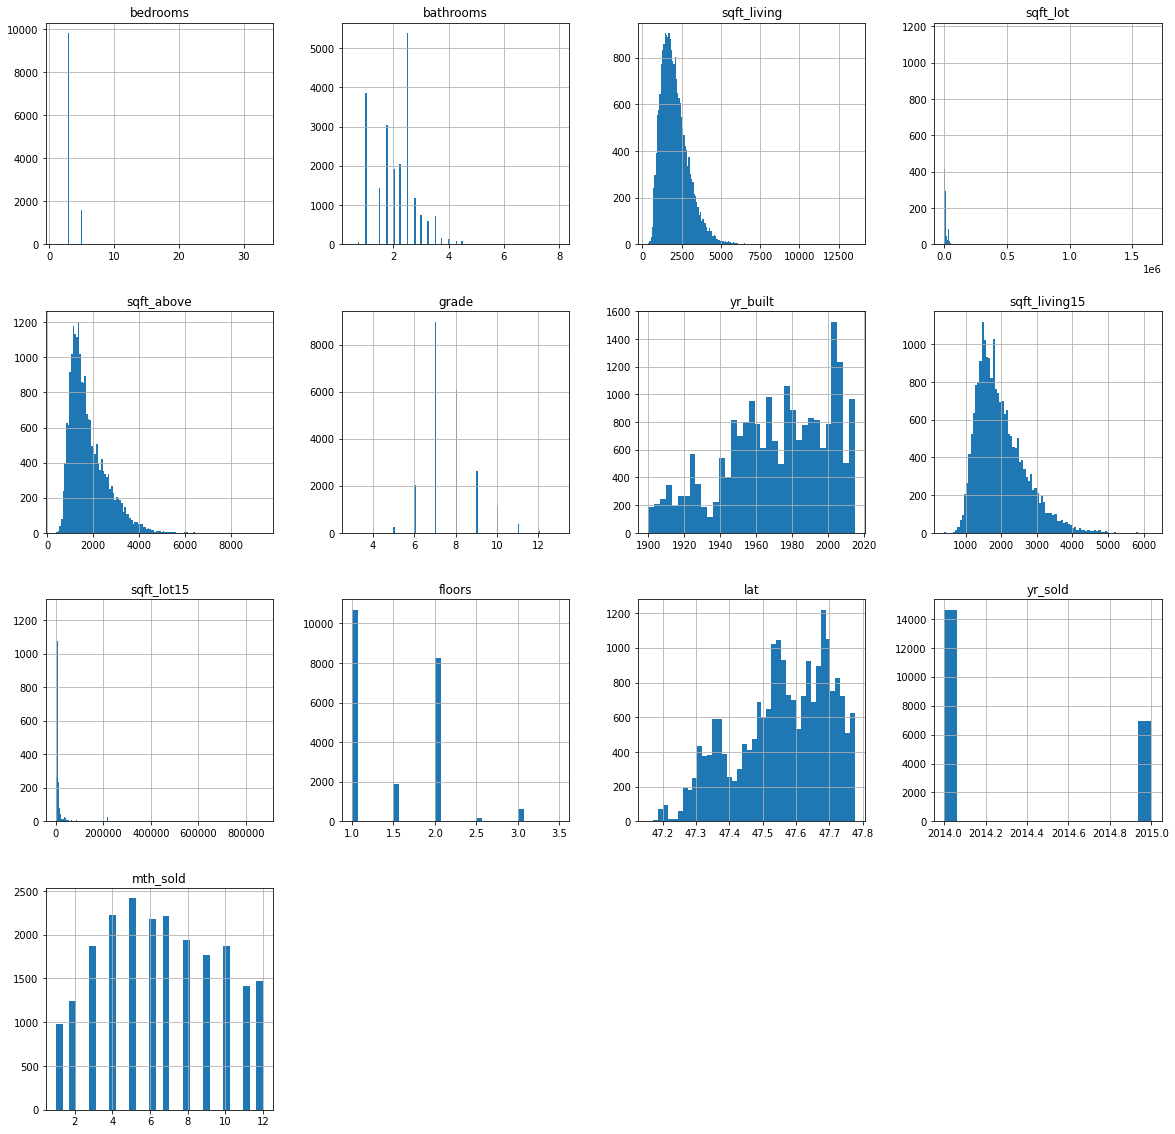

In [31]:
X[continuous].hist(figsize=[20, 20], bins='auto');

### Check for Multicollinearity

In [32]:
df_corr=X[continuous].corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc<0.99)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(mth_sold, yr_sold)",0.782325
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


### Preprocessing Data

In [62]:
# one hot encode categoricals

dummy_cat = ['condition', 'waterfront', 'view']
df_ohe = pd.get_dummies(X[dummy_cat], prefix=dummy_cat, drop_first=True)
zipcode_dummies = pd.get_dummies(X['zipcode'], prefix='zip', drop_first=True)

In [81]:
cont = ['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'mth_sold'] #'renovated', 
# excluding grade, sqft_above, sqft_living15, bathrooms given high correlation with sqft_living
# excluding yr_sold given high correlation with mth_sold

X_preprocessed = pd.concat([X[cont], df_ohe, zipcode_dummies], axis=1)
X_preprocessed

,sqft_living,sqft_lot,bedrooms,floors,mth_sold,condition_Fair,condition_Good,condition_Poor,condition_VeryGood,waterfront_NO,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180,5650,3,1.0,10,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7242,3,2.0,12,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,770,10000,2,1.0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,4,1.0,12,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1680,8080,3,1.0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,3,3.0,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21593,2310,5813,4,2.0,2,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
21594,1020,1350,2,2.0,6,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21595,1600,2388,3,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_preprocessed.columns

Index(['sqft_living', 'sqft_lot', 'bedrooms', 'renovated', 'floors',
       'mth_sold', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_VeryGood', 'waterfront_NO', 'waterfront_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NA', 'view_NONE',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',

### Continuous Variables - Transformations 

In [64]:
# dependent variable - log transformation improves the model
y_log = pd.DataFrame(np.log(y))

### Second Model

In [75]:
outcome = 'price'
data_ols = pd.concat([y_log, X_preprocessed], axis=1)
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

second_model = ols(formula=formula, data=data_ols).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1442.
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:02:49   Log-Likelihood:                 3743.9
No. Observations:               21597   AIC:                            -7316.
Df Residuals:                   21511   BIC:                            -6630.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.0234      0.015    790.862      0.000      11.994      12.053
sqft_living            0.0003   2.27e-06    137.129      0.000       0.000       0.000
sqft_lot            6.937e-07   3.69e-08     18.796      0.000    6.21e-07    7.66e-07
bedrooms              -0.0094      0.002     -4.989      0.000      -0.013      -0.006
floors                 0.0396      0.003     12.862      0.000       0.034       0.046
mth_sold              -0.0050      0.000    -11.281      0.000      -0.006      -0.004
condition_Fair        -0.1813      0.016    -11.427      0.000      -0.212      -0.150
condition_Good         0.0244      0.003      7.056      0.000       0.018       0.031
condition_Poor        -0.3498      0.038     -9.192      0.000      -0.424      -0.275
condition_VeryGood     0.0804      0.005     14.747      0.000       0.070       0.091
waterfront_NO          0.0031      0.004      0.699      0.484      -0.006       0.012
waterfront_YES         0.4156      0.021     19.496      0.000       0.374       0.457
view_EXCELLENT         0.2012      0.016     12.949      0.000       0.171       0.232
view_FAIR              0.0041      0.013      0.316      0.752      -0.022       0.030
view_GOOD              0.0787      0.011      6.984      0.000       0.057       0.101
view_NA               -0.0925      0.027     -3.479      0.001      -0.145      -0.040
view_NONE             -0.1411      0.007    -20.162      0.000      -0.155      -0.127
zip_98002             -0.0685      0.018     -3.796      0.000      -0.104      -0.033
zip_98003              0.0353      0.016      2.175      0.030       0.003       0.067
zip_98004              1.1815      0.016     74.674      0.000       1.151       1.213
zip_98005              0.8299      0.019     43.384      0.000       0.792       0.867
zip_98006              0.7110      0.014     49.927      0.000       0.683       0.739
zip_98007              0.7108      0.020     35.046      0.000       0.671       0.751
zip_98008              0.6748      0.016     41.518      0.000       0.643       0.707
zip_98010              0.2440      0.023     10.562      0.000       0.199       0.289
zip_98011              0.4818      0.018     26.565      0.000       0.446       0.517
zip_98014              0.2801      0.021     13.059      0.000       0.238       0.322
zip_98019              0.3206      0.018     17.497      0.000       0.285       0.357
zip_98022              0.0401      0.017      2.311      0.021       0.006       0.074
zip_98023             -0.0042      0.014     -0.295      0.768      -0.032       0.023
zip_98024              0.4205      0.025     16.557      0.000       0.371       0.470
zip_98027              0.5371      0.015     36.395      0.000       0.508       0.566
zip_98028              0.4314      0.0

In [82]:
# dropping variables with high p values - improves Cond. No.
X_preprocessed = X_preprocessed.drop(['waterfront_NO', 'view_FAIR', 'zip_98023', 
                                      'zip_98032', 'zip_98168'], axis=1)

outcome = 'price'
data_ols = pd.concat([y_log, X_preprocessed], axis=1)
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

second_model = ols(formula=formula, data=data_ols).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1532.
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:04:45   Log-Likelihood:                 3741.0
No. Observations:               21597   AIC:                            -7320.
Df Residuals:                   21516   BIC:                            -6674.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.0239      0.011   1098.418      0.000      12.002      12.045
sqft_living            0.0003   2.26e-06    137.222      0.000       0.000       0.000
sqft_lot            6.938e-07   3.69e-08     18.805      0.000    6.22e-07    7.66e-07
bedrooms              -0.0095      0.002     -5.023      0.000      -0.013      -0.006
floors                 0.0395      0.003     12.855      0.000       0.034       0.046
mth_sold              -0.0050      0.000    -11.286      0.000      -0.006      -0.004
condition_Fair        -0.1807      0.016    -11.389      0.000      -0.212      -0.150
condition_Good         0.0240      0.003      6.959      0.000       0.017       0.031
condition_Poor        -0.3491      0.038     -9.175      0.000      -0.424      -0.275
condition_VeryGood     0.0803      0.005     14.721      0.000       0.070       0.091
waterfront_YES         0.4130      0.021     19.686      0.000       0.372       0.454
view_EXCELLENT         0.2000      0.015     13.173      0.000       0.170       0.230
view_GOOD              0.0776      0.011      7.214      0.000       0.057       0.099
view_NA               -0.0937      0.026     -3.554      0.000      -0.145      -0.042
view_NONE             -0.1421      0.006    -23.091      0.000      -0.154      -0.130
zip_98002             -0.0647      0.016     -4.149      0.000      -0.095      -0.034
zip_98003              0.0391      0.013      2.897      0.004       0.013       0.065
zip_98004              1.1854      0.013     91.412      0.000       1.160       1.211
zip_98005              0.8338      0.017     49.504      0.000       0.801       0.867
zip_98006              0.7147      0.011     65.013      0.000       0.693       0.736
zip_98007              0.7145      0.018     39.370      0.000       0.679       0.750
zip_98008              0.6785      0.013     50.334      0.000       0.652       0.705
zip_98010              0.2476      0.021     11.643      0.000       0.206       0.289
zip_98011              0.4855      0.016     30.874      0.000       0.455       0.516
zip_98014              0.2836      0.019     14.568      0.000       0.245       0.322
zip_98019              0.3242      0.016     20.309      0.000       0.293       0.355
zip_98022              0.0437      0.015      2.950      0.003       0.015       0.073
zip_98024              0.4242      0.024     17.861      0.000       0.378       0.471
zip_98027              0.5408      0.012     46.300      0.000       0.518       0.564
zip_98028              0.4352      0.013     32.394      0.000       0.409       0.461
zip_98029              0.6607      0.013     51.282      0.000       0.635       0.686
zip_98030              0.0670      0.014      4.784      0.000       0.040       0.094
zip_98031              0.0890      0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


JB Results [('Jarque-Bera', 12863.486181632526), ('Prob', 0.0), ('Skew', -0.4353863032722356), ('Kurtosis', 6.679198672723119)]
Empty DataFrame
Columns: [cc]
Index: []
mth_sold           1.005985
condition_Poor     1.008778
condition_Fair     1.021390
zip_98148          1.045876
view_NA            1.050581
                    ...    
bedrooms           1.593182
view_EXCELLENT     1.732917
view_NONE          1.782301
sqft_living        2.244797
const             62.265894
Name: Variance Inflation Factor, Length: 81, dtype: float64


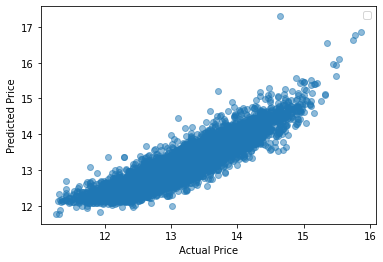

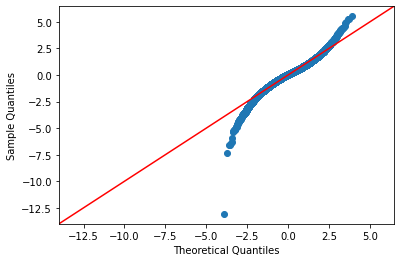

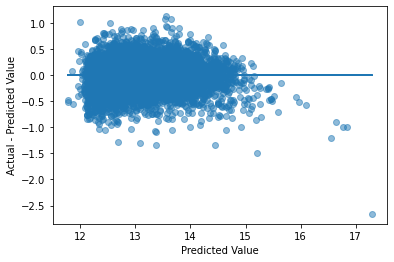

In [83]:
# Linearity check

model = second_model
X_model = X_preprocessed
y_model = y_log['price']

preds = model.predict(X_model)
fig, ax = plt.subplots()
ax.scatter(y_model, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

# Normality of residuals check

residuals = (y_model - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

# JB test
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print("JB Results", list(zip(name, test)))

# Homoscedasticity check

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_model))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# multicollinearity

df_corr=X_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
print(df_corr[(df_corr.cc>.75) & (df_corr.cc<0.99)])

## VIF NOT WORKING WHEN USE BOOLEAN FOR RENOVATED COLUMN ##
predictors_int = sm.add_constant(predictors)
model = sm.OLS(y_log['price'],predictors_int).fit()
vif = [variance_inflation_factor(predictors_int.values, i) for i in range(predictors_int.shape[1])]
vif_ser = pd.Series(vif, index=predictors_int.columns, name="Variance Inflation Factor")
print(vif_ser.sort_values())

In [73]:
predictors_int

,const,sqft_living,sqft_lot,bedrooms,renovated,floors,mth_sold,condition_Fair,condition_Good,condition_Poor,...,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1.0,1180,5650,3,False,1.0,10,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,2570,7242,3,True,2.0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,770,10000,2,False,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1960,5000,4,False,1.0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1680,8080,3,False,1.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,1530,1131,3,False,3.0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,1.0,2310,5813,4,False,2.0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
21594,1.0,1020,1350,2,False,2.0,6,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21595,1.0,1600,2388,3,False,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final Model

Going to take log of sq footage to see if that improves residuals, also going to get rid of Waterfront_NO, view_FAIR, zip codes with high p values

In [ ]:
X_preprocessed.columns

In [49]:
# Log transformation

cont_cols = ['sqft_living', 'sqft_lot']
df_cont = X[cont_cols]

log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

In [ ]:
## V1 ##
cont = ['bedrooms', 'renovated', 'floors', 'lat'] #lat?
X_preprocessed_2 = pd.concat([X[cont], df_log, df_ohe, zipcode_dummies], axis=1) # zip?
X_preprocessed_2 = X_preprocessed_2.drop(['waterfront_NO', 'view_FAIR', 'zip_98003',
                                          'zip_98014', 'zip_98019', 'zip_98023', 'zip_98030',
                                          'zip_98031', 'zip_98055', 'zip_98188', 'zip_98198'], 
                                         axis=1)

X_preprocessed_2

In [87]:
## V2 ##

categoricals = ['grade', 'condition', 'bedrooms', 'bathrooms', 'floors', 
                'waterfront', 'mth_sold', 'view', 'zipcode']

dummy_cat = ['waterfront', 'condition', 'view'] #got rid of view, condition

df_ohe = pd.get_dummies(X[dummy_cat], prefix=dummy_cat, drop_first=True)

#cont = ['renovated'] #lat? # floors #bedrooms
X_preprocessed_2 = pd.concat([df_log, df_ohe, zipcode_dummies], axis=1) # zip? X[cont] X['renovated'], 
X_preprocessed_2 = X_preprocessed_2.drop(['waterfront_NO', 'sqft_lot_log',
                                          'zip_98032', 'view_FAIR',
                                          'zip_98023', 'zip_98002'], axis=1) 
                                          
                                          
                                          #'zip_98003',
                                          #'zip_98014', 'zip_98019', 'zip_98023', 'zip_98030',
                                          #'zip_98031', 'zip_98055', 'zip_98188', 'zip_98198'], 
                                          #'zip_98178'], 
                                         #axis=1)

X_preprocessed_2

# removing lat, keeping zip yields 0.853 R2 but way lower cond. no (500), similar skew and kurt - best model
# keeping lat, removing zip yields 0.69 R2
# removing both yields very low R2 around 0.523
# keeping both - 0.857 R2, 3544.428 JB, 4.88e+04 cond no, -0.13 skew, 5 kurt


# A condition number of 10-30 indicates multicollinearity, and a condition number 
# above 30 indicates strong multicollinearity.

,sqft_living_log,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_VeryGood,view_EXCELLENT,view_GOOD,view_NA,view_NONE,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7.073270,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,7.851661,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,6.646391,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7.580700,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7.426549,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21593,7.745003,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
21594,6.927558,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21595,7.377759,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
outcome = 'price'
data_ols = pd.concat([y_log, X_preprocessed_2], axis=1)
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

final_model = ols(formula=formula, data=data_ols).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1547.
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:07:01   Log-Likelihood:                 3357.1
No. Observations:               21597   AIC:                            -6560.
Df Residuals:                   21520   BIC:                            -5946.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.5260      0.031    239.220      0.000       7.464       7.588
sqft_living_log        0.6799      0.004    175.090      0.000       0.672       0.687
waterfront_YES         0.4487      0.021     21.034      0.000       0.407       0.491
condition_Fair        -0.1267      0.016     -7.858      0.000      -0.158      -0.095
condition_Good         0.0078      0.003      2.315      0.021       0.001       0.014
condition_Poor        -0.2708      0.039     -6.992      0.000      -0.347      -0.195
condition_VeryGood     0.0564      0.005     10.367      0.000       0.046       0.067
view_EXCELLENT         0.2570      0.015     16.660      0.000       0.227       0.287
view_GOOD              0.1044      0.011      9.547      0.000       0.083       0.126
view_NA               -0.0944      0.027     -3.519      0.000      -0.147      -0.042
view_NONE             -0.1555      0.006    -24.952      0.000      -0.168      -0.143
zip_98003              0.0460      0.014      3.337      0.001       0.019       0.073
zip_98004              1.2450      0.013     94.203      0.000       1.219       1.271
zip_98005              0.8490      0.017     49.425      0.000       0.815       0.883
zip_98006              0.7570      0.011     67.425      0.000       0.735       0.779
zip_98007              0.7167      0.019     38.725      0.000       0.680       0.753
zip_98008              0.6735      0.014     48.914      0.000       0.646       0.700
zip_98010              0.3206      0.022     14.833      0.000       0.278       0.363
zip_98011              0.4811      0.016     29.935      0.000       0.450       0.513
zip_98014              0.3938      0.020     20.087      0.000       0.355       0.432
zip_98019              0.3605      0.016     22.163      0.000       0.329       0.392
zip_98022              0.1071      0.015      7.163      0.000       0.078       0.136
zip_98024              0.5471      0.024     22.809      0.000       0.500       0.594
zip_98027              0.5915      0.012     49.636      0.000       0.568       0.615
zip_98028              0.4366      0.014     31.756      0.000       0.410       0.464
zip_98029              0.6790      0.013     51.782      0.000       0.653       0.705
zip_98030              0.0680      0.014      4.753      0.000       0.040       0.096
zip_98031              0.0927      0.014      6.652      0.000       0.065       0.120
zip_98033              0.8532      0.012     72.914      0.000       0.830       0.876
zip_98034              0.5618      0.011     52.244      0.000       0.541       0.583
zip_98038              0.2032      0.011     19.331      0.000       0.183       0.224
zip_98039              1.5028      0.030     49.980      0.000       1.444       1.562
zip_98040              1.0100      0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


JB Results [('Jarque-Bera', 3142.856011952616), ('Prob', 0.0), ('Skew', 0.05326750222460519), ('Kurtosis', 4.865796774663683)]
condition_Poor      1.008972
condition_Fair      1.018912
zip_98039           1.047384
zip_98148           1.049364
view_NA             1.050290
                     ...    
zip_98103           1.477904
waterfront_YES      1.532475
view_EXCELLENT      1.726623
view_NONE           1.764647
const             496.442801
Name: Variance Inflation Factor, Length: 77, dtype: float64


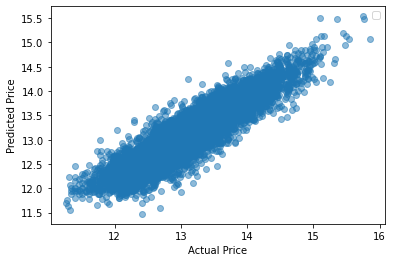

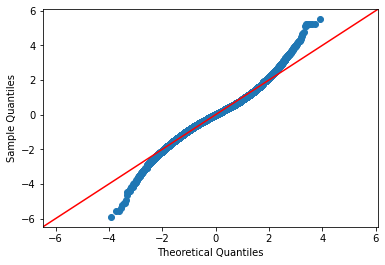

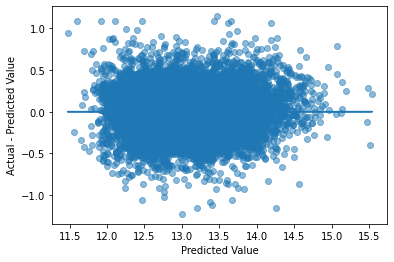

In [89]:
# Linearity check

model = final_model
X_model = X_preprocessed_2
y_model = y_log['price']

preds = model.predict(X_model)
fig, ax = plt.subplots()

ax.scatter(y_model, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

# Normality of residuals check

residuals = (y_model - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

# JB test
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print("JB Results", list(zip(name, test)))

# Homoscedasticity check

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_model))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# Multicollinearity

df_corr=X_model.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr[(df_corr.cc>.75) & (df_corr.cc<0.99)]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(y_model,predictors_int).fit()

vif = [variance_inflation_factor(predictors_int.values, i) for i in range(predictors_int.shape[1])]
vif_ser = pd.Series(vif, index=predictors_int.columns, name="Variance Inflation Factor")
print(vif_ser.sort_values()) # nothing above 5 other than constant which implies little multicollinearity

In [ ]:
## UNCOMMENT ONCE FINAL MODEL IS FINISHED

In [ ]:
#final_model = LinearRegression()
#final_model.fit(X_final, y_norm)

#print("Final Model R^2: ", final_model.score(X_train_final, y_norm))

## Checking Final Model Assumptions

In [ ]:
# Linearity

X_final = X_preprocessed # add when finished
y_final = y_norm

preds = second_model.predict(X_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_final.min(), y_final.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_final, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [ ]:
# Normality of Residuals

import scipy.stats as stats

residuals = (y_final - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [ ]:
# Independence (would be train)

X_final = X_train_preprocessed

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
pd.Series(vif, index=X_final.columns, name="Variance Inflation Factor") # looking for below 5

In [ ]:
# Homoscedasticity

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_final))]) # would be test
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## Appendix - Extra

### Train test split for future model validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

condition = X_train[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(condition)

# Inspect the categories of the fitted encoder
ohe.categories_

condition_encoded = ohe.transform(condition)

# (5a) Make the transformed data into a dataframe
condition_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

X_train.drop("condition", axis=1, inplace=True)

X_train = pd.concat([X_train, condition_encoded], axis=1)
X_train


### Transforming Test Set

In [ ]:
# only keep relevant columns
X_test = X_test.loc[:, relevant_columns]

#continuous = ['sqft_living', 'sqft_lot']
#categoricals = ['grade', 'condition', 'bedrooms', 'bathrooms', 'floors', 
#                'waterfront', 'mth_sold', 'view', 'zipcode']
#dummy_cat = ['condition', 'waterfront', 'view']

df_cont = X_test[continuous]

# take the log of continuous variables
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

# take log and normalize y
y_log_test = pd.DataFrame(np.log(y_test))
y_norm_test = y_log_test.apply(normalize)


# categoricals
df_ohe = pd.get_dummies(X_test[dummy_cat], prefix=dummy_cat, drop_first=True)

floors_dummies = pd.get_dummies(X_test['floors'], prefix='floors', drop_first=True)
bedrooms_dummies = pd.get_dummies(X_test['bedrooms'], prefix='beds', drop_first=True)
zipcode_dummies = pd.get_dummies(X_test['zipcode'], prefix='zip', drop_first=True)

# join categorical and continuous dataframes together, drop original columns
X_test_preprocessed = pd.concat([df_log_norm, df_ohe, floors_dummies, 
                                 bedrooms_dummies, zipcode_dummies], axis=1)

These are the R^2 values of the train and test models using a linear regression with square footage of the living room as the independent variable and listing price as the dependent variable. We get similar R^2s for each, around 0.5, which  is a good sign that the model is predicting the test data correctly, but is a fairly low R^2 for an inferential model as currently it only explains around 50% of the variation in house price.

In [ ]:
# scores using cross validation with 10 splits

X_base = X_train[[most_correlated_feature]]

base_model = LinearRegression()
base_model.fit(X_base, y_train)

splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=base_model,
    X=X_base,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
# scores using single test/train split

base_model.fit(X_base, y_train)

print("Train R^2: ", str(base_model.score(X_base, y_train)))
print("Test R^2: ", base_model.score(X_test[[most_correlated_feature]], y_test))

In [ ]:
X_base = X[[most_correlated_feature]]
base_model = LinearRegression()
base_model.fit(X_base, y)
print("BASE R^2: ", str(base_model.score(X_base, y)))

In [ ]:
pd.plotting.scatter_matrix(X[continuous], figsize=(20,20));

In [ ]:
f = 'price~sqft_living'
#f2 = 'sales~radio'
model = smf.ols(formula=f, data=data_ols).fit()
#model2 = smf.ols(formula=f2, data=data).fit()

resid1 = model.resid
#resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
#fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

In [ ]:
# Linearity

X_final = X_preprocessed # add when finished
y_final = y

preds = second_model.predict(X_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_final.min(), y_final.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_final, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [ ]:
# log transform continuous variables where it makes sense

# log cols
cols_log = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

df_transf = pd.DataFrame([])

for feat in cols_log:
    df_transf[feat] = X[feat].map(lambda x: np.log(x))
    
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = df_transf.apply(normalize)

features_final.hist(figsize  = [20, 20], bins='auto')

In [ ]:
### Normalize log

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

# apply normalization function
df_log_norm = df_log.apply(normalize)


In [ ]:
#def calculate_residuals(model, features, label):
#    """
#    Creates predictions on the features with the model and calculates residuals
#    """
#    predictions = model.predict(features)
#    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
#    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
#    return df_results

preds = model.predict(X_model)
fig, ax = plt.subplots()

perfect_line = np.arange(y_model.min(), y_model.max())
#ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_model, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

plt.plot(perfect_line)

In [ ]:
##### EXTRA ######

#join categorical and continuous dataframes together, drop original columns
X_preprocessed = X.drop(categoricals, axis=1)
X_preprocessed = pd.concat([X_preprocessed, df_ohe, zipcode_dummies], axis=1) #df_cont?

X_preprocessed

#X_preprocessed = pd.concat([df_log_norm, df_ohe, condition_dummies, #floors_dummies, bedrooms_dummies, 
#                                  zipcode_dummies, X[other_continuous]], axis=1)


In [ ]:
second_model = LinearRegression()
second_model.fit(X_preprocessed, y_norm)

print("Second Model R^2: ", second_model.score(X_preprocessed, y_norm))

In [ ]:
# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

y_log = pd.DataFrame(np.log(y))
y_norm = y_log.apply(normalize)

In [ ]:
log_cols = ['sqft_living', 'sqft_lot']
other_continuous = ['floors', 'bedrooms']
categoricals = ['grade', 'condition', 'bedrooms', 'bathrooms', 'floors', 
                'waterfront', 'mth_sold', 'view', 'zipcode']
dummy_cat = ['condition', 'waterfront', 'view']

# log transform
df_cont = X[log_cols]
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

